# 라이브러리

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import random

#from ggplot import *
#from scipy.stats import logistic
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import *
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
#import graphviz
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.svm import SVC, SVR
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)


In [2]:
import pandas as pd
DATA_PATH = './dataset/CARD/'
DATA_PATH_2 = './dataset/CUSTOMER/'
DATA_PATH_3 = './dataset/CC/'
cc_21_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_40(raw).csv', encoding="utf-8-sig")
cc_21_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_50(raw).csv', encoding="utf-8-sig")
cc_21_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_60(raw).csv', encoding="utf-8-sig")
cc_22_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_40(raw).csv', encoding="utf-8-sig")
cc_22_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_50(raw).csv', encoding="utf-8-sig")
cc_22_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_60(raw).csv', encoding="utf-8-sig")
cc_23_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_40(raw).csv', encoding="utf-8-sig")
cc_23_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_50(raw).csv', encoding="utf-8-sig")
cc_23_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_60(raw).csv', encoding="utf-8-sig")
cc_22_40 = pd.read_csv(DATA_PATH_3 + 'cc_22_40.csv', encoding="utf-8-sig")
cc_22_50 = pd.read_csv(DATA_PATH_3 + 'cc_22_50.csv', encoding="utf-8-sig")
cc_22_60 = pd.read_csv(DATA_PATH_3 + 'cc_22_60.csv', encoding="utf-8-sig")

KeyboardInterrupt: 

In [ ]:
cc_21_40_n = pd.read_csv(DATA_PATH_3 + 'cc_21_40_n.csv', encoding="utf-8-sig")
cc_21_50_n = pd.read_csv(DATA_PATH_3 + 'cc_21_50_n.csv', encoding="utf-8-sig")
cc_21_60_n = pd.read_csv(DATA_PATH_3 + 'cc_21_60_n.csv', encoding="utf-8-sig")

cc_22_40_n = pd.read_csv(DATA_PATH_3 + 'cc_22_40_n.csv', encoding="utf-8-sig")
cc_22_50_n = pd.read_csv(DATA_PATH_3 + 'cc_22_50_n.csv', encoding="utf-8-sig")
cc_22_60_n = pd.read_csv(DATA_PATH_3 + 'cc_22_60_n.csv', encoding="utf-8-sig")

cc_23_40_n = pd.read_csv(DATA_PATH_3 + 'cc_23_40_n.csv', encoding="utf-8-sig")
cc_23_50_n = pd.read_csv(DATA_PATH_3 + 'cc_21_50_n.csv', encoding="utf-8-sig")
cc_23_60_n = pd.read_csv(DATA_PATH_3 + 'cc_21_60_n.csv', encoding="utf-8-sig")

# 함수

In [ ]:
import time

def execution_time(func):
    """
    함수의 실행 시간을 측정하여, 시:분:초 형식으로 출력하는 데코레이터 함수입니다.

    Parameters:
    func (function): 실행 시간을 측정할 함수.

    Returns:
    function: 실행 시간을 측정하고 출력한 후, 원래 함수의 결과를 반환하는 래퍼 함수.

    Example:
    >>> @execution_time
    >>> def example_function():
    >>>     time.sleep(2)

    >>> example_function()
    Execution time for example_function: 0h 0m 2.00s
    """
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        hours, rem = divmod(elapsed_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print(f"Execution time for {func.__name__}: {int(hours)}h {int(minutes)}m {seconds:.2f}s")
        return result
    return wrapper


In [ ]:
import pandas as pd 
import numpy as np

def reduce_mem_usage(df, float16_as32=True):
    """
    데이터프레임의 메모리 사용량을 줄이기 위해 열의 데이터 타입을 최적화하는 함수입니다.
    
    수치형 열에 대해서만 메모리 최적화를 수행하며, 정수형은 int8, int16, int32, int64 등의 가장 작은 가능한 타입으로,
    실수형은 float16, float32, float64로 변환합니다. 기본적으로 float16 대신 float32를 사용할 수 있습니다.

    Parameters:
    df (pd.DataFrame): 메모리 최적화를 적용할 데이터프레임.
    float16_as32 (bool, optional): True일 경우, float16 대신 float32를 사용하여 정밀도를 보장합니다.
                                   기본값은 True입니다.

    Returns:
    pd.DataFrame: 메모리 최적화가 적용된 데이터프레임.

    Example:
    >>> df = pd.DataFrame({'col1': range(100), 'col2': np.random.rand(100)})
    >>> df_optimized = reduce_mem_usage(df)

    출력 예:
    데이터프레임의 초기 메모리 사용량은 0.01 MB입니다.
    최적화 후 데이터프레임의 메모리 사용량은: 0.00 MB입니다.
    메모리 사용량이 90.0% 감소했습니다.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('데이터프레임의 초기 메모리 사용량은 {:.2f} MB입니다.'.format(start_mem))

    for col in df.columns:  # 각 열의 이름을 반복합니다.
        col_type = df[col].dtype  # 열의 데이터 타입을 가져옵니다.
        if col_type != object and str(col_type) != 'category':  # 객체 타입이 아닌 수치형 변수만 처리합니다.
            c_min, c_max = df[col].min(), df[col].max()  # 해당 열의 최소값과 최대값을 계산합니다.
            if str(col_type)[:3] == 'int':  # 정수형 변수일 경우 (int8, int16, int32, int64 모두 포함)
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:  # 실수형일 경우
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    if float16_as32:  # 더 높은 정밀도가 필요하면 float32를 선택할 수 있습니다.
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('최적화 후 데이터프레임의 메모리 사용량은: {:.2f} MB입니다.'.format(end_mem))
    print('메모리 사용량이 {:.1f}% 감소했습니다.'.format(100 * (start_mem - end_mem) / start_mem))

    return df


In [ ]:
@execution_time
def clean_df(data):
    """
    데이터 전처리를 수행하고, 메모리 사용량을 줄이기 위한 최적화를 수행하는 함수입니다.

    이 함수는 '고객ID' 열을 문자열 형식으로 변환하고, `reduce_mem_usage` 함수를 호출하여
    데이터프레임의 메모리 사용량을 최적화합니다. 또한, 최적화된 데이터프레임의 정보를 출력합니다.

    Parameters:
    data (pd.DataFrame): 전처리와 메모리 최적화를 적용할 데이터프레임.

    Returns:
    pd.DataFrame: 전처리 및 메모리 최적화가 완료된 데이터프레임.

    Decorators:
    @execution_time: 함수의 실행 시간을 측정하고 출력하는 데코레이터.

    Example:
    >>> df = pd.DataFrame({'고객ID': [12345, 67890], 'value': [100, 200]})
    >>> cleaned_df = clean_df(df)

    출력 예:
    Execution time for clean_df: 0h 0m 0.12s
    데이터프레임의 초기 메모리 사용량은 0.01 MB입니다.
    최적화 후 데이터프레임의 메모리 사용량은: 0.00 MB입니다.
    메모리 사용량이 50.0% 감소했습니다.
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 2 entries, 0 to 1
    Data columns (total 2 columns):
     #   Column  Non-Null Count  Dtype
    ---  ------  --------------  -----
     0   고객ID   2 non-null      object
     1   value   2 non-null      int8
    dtypes: int8(1), object(1)
    memory usage: 80.0+ bytes
    """
    data['고객ID'] = data['고객ID'].astype(str)
    data = reduce_mem_usage(data)
    print(data.info())
    return data


# 고객, 연령대 등 추출

In [ ]:
# 고객 연령대 추출
def customer_generation(df, feature):
    """
    특정 연령대의 데이터를 추출하여 반환하는 함수입니다.

    이 함수는 데이터프레임에서 입력된 특정 연령대에 해당하는 행만을 필터링하여 
    새로운 데이터프레임으로 반환합니다.

    Parameters:
    df (pd.DataFrame): 연령대가 포함된 원본 데이터프레임.
    feature (str): 추출하고자 하는 연령대를 나타내는 문자열. 예: "40대", "50대" 등.

    Returns:
    pd.DataFrame: 입력된 연령대만 포함된 필터링된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 3],
    ...     '연령대': ['40대', '50대', '40대'],
    ...     '소비금액': [10000, 20000, 15000]
    ... })
    >>> customer_generation(data, '40대')
    40대만 추출한 데이터프레임입니다.
       고객ID  연령대     소비금액
    0      1  40대  10000
    2      3  40대  15000
    """
    df = df[df['연령대'].isin([f'{feature}'])]
    print(f'{feature}만 추출한 데이터프레임입니다.')
    print(df.head())
    return df


In [ ]:
# 고객연령대 나눈 데이터프레임에서, ID 중복없이 추출
def customer_generation_id(df):
    """
    고객 ID의 중복을 제거하여 고유한 고객 ID 리스트를 생성하고 반환하는 함수입니다.

    이 함수는 입력된 데이터프레임에서 '고객ID'와 '연령대' 열만 선택하여,
    '고객ID'의 고유한 값들로 구성된 새로운 데이터프레임을 반환합니다. 
    반환된 데이터프레임은 중복되지 않은 고객 ID만을 포함합니다.

    Parameters:
    df (pd.DataFrame): '고객ID'와 '연령대' 열을 포함한 원본 데이터프레임.

    Returns:
    pd.DataFrame: 고유한 고객 ID를 포함한 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 1, 3],
    ...     '연령대': ['40대', '50대', '40대', '60대']
    ... })
    >>> customer_generation_id(data)
       고객ID
    0     1
    1     2
    2     3
    """
    selected_df = df.loc[:, ['고객ID', '연령대']]
    df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    print(df_edit.head())
    return df_edit


In [ ]:
# 고객 연령대 나누고, 바로 id를 DataFrame으로 추출
def customer_gen_id(df, feature=None, show_age=False):
    """
    특정 연령대의 고유한 고객 ID를 추출하는 함수입니다.
    
    이 함수는 입력된 데이터프레임에서 특정 연령대(`feature`)에 해당하는 고객들을 필터링하여,
    중복되지 않은 고객 ID를 반환합니다. `show_age` 매개변수를 통해 고객 ID만 반환할지,
    또는 고객 ID와 연령대를 함께 반환할지를 선택할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '고객ID'와 '연령대' 열을 포함한 원본 데이터프레임.
    feature (str, optional): 필터링하고자 하는 연령대 (예: "40대", "50대").
                            None일 경우 모든 연령대가 선택됩니다.
    show_age (bool, optional): True일 경우 고객 ID와 연령대를 포함하여 반환하며,
                               False일 경우 고객 ID만 반환합니다. 기본값은 False입니다.

    Returns:
    pd.DataFrame: 고유한 고객 ID를 포함한 데이터프레임. `show_age`가 True일 경우,
                 고객 ID와 연령대를 포함합니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 1, 3, 2],
    ...     '연령대': ['40대', '50대', '40대', '60대', '50대']
    ... })
    >>> customer_gen_id(data, feature="50대", show_age=True)
       고객ID  연령대
    0     2  50대
    >>> customer_gen_id(data, feature="40대", show_age=False)
       고객ID
    0     1
    """
    df_filtered = df[df['연령대'].isin([f'{feature}'])]
    selected_df = df_filtered.loc[:, ['고객ID', '연령대']]
    
    if show_age:  # show_age가 True일 때 고객ID와 연령대 포함
        df_edit = selected_df.drop_duplicates(subset=['고객ID', '연령대'])
    else:  # show_age가 False일 때 고객ID만 포함
        df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(df_edit.head())
    return df_edit


# 재분류

In [ ]:
def rename_category_store(df):
    """
    가맹점 업종명을 지정된 카테고리로 재분류하는 함수입니다.

    이 함수는 입력된 데이터프레임의 '가맹점업종명' 열에 대해 특정 값들을 지정된 카테고리 이름으로
    대체하여 재분류합니다. 이를 통해 다양한 업종명이 지정된 범주의 카테고리로 통합됩니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '가맹점업종명' 열이 재분류된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['보습학원', '피부미용실', '골프경기장', '주점', '약 국'],
    ...     '승인금액': [10000, 20000, 30000, 40000, 50000]
    ... })
    >>> rename_category_store(data)
    가맹점업종명 열을 다음과 같은 카테고리로 재분류합니다: ['교육/학원', '미용', '스포츠/레저', '외식', '의료/보험']
    
    """
    mapping = {
        '교육/학원': ['보습학원', '예·체능계학원', '외국어학원', '기타 교육기관', '기능학원', '학원', '학습지교육', '초중고교육기관'],
        '미용': ['미용원', '피부미용실'],
        '스포츠/레저': ['기타레져업소', '스포츠·레져용품', '스포츠의류', '스크린골프', '헬스클럽', '골프경기장', '종합레져타운', '골프용품 전문점', '골프연습장', '안마/스포츠마사지', '레져업소', '수 영 장'],
        '여행/교통': ['기타숙박업', '철도', '특급호텔', '1급 호텔', '렌터카', '항공사', '콘도', '2급 호텔', '관광여행', '여객선', '고속버스', '택시'],
        '외식': ['일반한식', '주점', '서양음식', '중국식', '일식·회집', '한정식', '칵테일바', '갈비전문점'],
        '대형마트': ['슈퍼마켓', '농협하나로클럽', '농,축협직영매장', '대형할인점'],
        '백화점': ['면 세 점', '자사카드발행백화점'],
        '편의점': ['편 의 점'],
        '음식료품': ['정육점', '스넥', '농·축·수산품', '농축수산가공품', '주류판매점', '홍삼제품', '인삼제품', '기타건강식품'],
        '카페/베이커리': ['기타음료식품', '제과점'],
        '의료/보험': ['약 국', '의 원', '한 의 원', '치과의원', '기타의료기관 및 기타의료기기', '한약방', '한방병원', '생명보험', '건강진단', '기타보험', '병 원(응급실운영)', '치과병원', '동물병원', '종합병원', '손해보험'],
        '주유': ['SK주유소', '쌍용S-OIL', 'GS주유소', '주유소', 'SK가스충전소', '현대정유(오일뱅크)', 'GS가스충전소', '쌍용S-OIL가스충전소', '현대정유가스충전소', 'E1가스충전소', '전기차충전소'],
        '문화생활': ['문화취미기타', '영화관', '티켓'],
        '이동통신요금': ['이동통신요금'],
        '반려동물': ['애완동물'],
        '간편결제': ['인터넷P/G'],
        '기타': ['전자상거래상품권전문판매', '캐주얼의류', 'CATV', '택시회사', '위성방송', '음반영상물', '제 화','주방용구', '연 쇄 점', '액세서리', '전문서적', '주차장', '민예·공예품', '건축용 요업제품', '단란주점', '옷감·직물', '자동차시트·타이어', '독서실', '농기계', '조명기구', '세차장', '사무서비스', '컴퓨터', '가 방', '보일러·펌프·샷시', '카페트,커튼,천막,지물', '자동차부품', '자동차정비', '기타유통업', '이륜차판매', '카인테리어', '화물운송', '내의판매', '목재·석재·철물', '기타 사무용품', '기타가구', '신 발', '비영리/비대상', '기타대인서비스', '기타전기제품', 'DP&E', '주방용식기', '가타자동차서비스', '기타농업관련', '구내매점(국가기관등)', '아동의류', '이용원', '조세서비스', '기념품점', '유흥주점', '통신기기', '화원', '화장품', '기타잡화', '유아원', 'LPG취급점', '페인트', '출판 및 인쇄물', '귀금속', '문구용품', '위탁급식업', '비료,사료,종자', '침구·수예점', '당구장', '가전제품', '인터넷Mall', '가정용품수리', '사무·통신기기수리', '안경', '세탁소', '사우나', '일반서적', '노 래 방', '기계공구',  '완구점', '기타의류', '미곡상', '기타용역서비스', '기타수리서비스', '기타건축자재', '일반가구', '사무용 OA기기', '인테리어전문', '가례서비스업', '시 계', '비영리/대상', '윤활유전문판매', '정수기', '공공요금대행서비스/소득공제비대상', '화방·표구점', '볼 링 장', '인터넷종합Mall', '기타 전문점', '통신판매업1', '종합용역', '전자상거래상품권', '보관및 창고업', '유류판매', '업종미등록', '통신서비스/소득공제비대상', '기타서적문구', '수족관', '공공요금대행서비스/소득공제대상', '상품권전문판매', '혼례서비스업', '냉열기기', '비씨카드 정산용(할인)', '일반(통신판매)', '기타4', '기타1', '부동산중개·임대', 'CATV홈쇼핑', '소프트웨어', '의료용품', '정장', '맞춤복점', '단체복', '상 품 권', 'PG상품권', '비씨카드 정산용가맹점',  '미용재료']
    }
    for category, values in mapping.items():
        df['가맹점업종명'] = df['가맹점업종명'].replace(values, category)
    print(df['가맹점업종명'].unique())
    return df


In [ ]:
def rename_category_store_5(df):
    """
    가맹점 업종명을 미리 정의된 카테고리로 분류하여 새로운 '분류' 컬럼에 추가하는 함수입니다.

    이 함수는 입력된 데이터프레임의 '가맹점업종명' 열의 값들을 사전 정의된 카테고리로 매핑하여,
    각 가맹점이 해당하는 카테고리 정보를 새로운 '분류' 컬럼에 추가합니다. 이를 통해 다양한 업종을
    지정된 범주의 카테고리로 분류하여 분석할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '분류' 열이 추가된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['백화점', '피부미용실', '골프경기장', '주점', '약국'],
    ...     '승인금액': [10000, 20000, 30000, 40000, 50000]
    ... })
    >>> rename_category_store_5(data)
    가맹점업종명 열을 다음과 같은 카테고리로 재분류합니다: ['쇼핑', '기타', '여가', '기타', '식음료']
    
    Categories:
      - 생활비: ['이동통신요금', '의료/보험', '교육/학원', '반려동물', '주유', '미용']
      - 식음료: ['외식', '카페/베이커리', '음식료품']
      - 쇼핑: ['백화점', '홈쇼핑', '온라인쇼핑', '간편결제', '편의점', '대형마트']
      - 여가: ['스포츠/레저', '여행/교통', '문화생활']
      - 기타: ['기타']
    
    """
    
    mapping = {
       '생활비' : ['이동통신요금', '의료/보험' , '교육/학원', '반려동물', '주유', '미용'],
        '식음료' : ['외식', '카페/베이커리', '음식료품'],
        '쇼핑' : ['백화점', '홈쇼핑', '온라인쇼핑', '간편결제', '편의점', '대형마트'],
        '여가' : ['스포츠/레저', '여행/교통', '문화생활'],
        '기타' : ['기타']
    }
 
    df['분류'] = df['가맹점업종명']
    for category, values in mapping.items():
        df.loc[df['가맹점업종명'].isin(values), '분류'] = category

    print(df['분류'].unique())
    return df


In [ ]:
def rename_category_region(df):
    """
    가맹점 위치의 광역시도를 지정된 지역권으로 재분류하는 함수입니다.

    이 함수는 데이터프레임의 '가맹점_광역시도' 열에 대해 지역별 분류를 수행하여,
    수도권, 영남권, 충청권, 호남권, 강원·제주권으로 대체합니다.

    Parameters:
    df (pd.DataFrame): '가맹점_광역시도' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '가맹점_광역시도' 열이 지역권으로 재분류된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점_광역시도': ['서울특별시', '부산광역시', '제주특별자치도', '경기도', '대전광역시'],
    ...     '승인금액': [10000, 20000, 15000, 5000, 3000]
    ... })
    >>> rename_category_region(data)
    '가맹점_광역시도' 열을 다음과 같이 재분류합니다: 수도권, 영남권, 강원·제주권, 충청권 등.
    """
    region_groups = {
        '서울특별시': '수도권', '경기도': '수도권', '인천광역시': '수도권',
        '부산광역시': '영남권', '울산광역시': '영남권', '경상남도': '영남권',
        '충청북도': '충청권', '충청남도': '충청권', '대전광역시': '충청권', '세종특별자치시': '충청권',
        '전북특별자치도': '호남권', '전라남도': '호남권', '광주광역시': '호남권',
        '강원특별자치도': '강원·제주권', '제주특별자치도': '강원·제주권'
    }

    df['가맹점_광역시도'] = df['가맹점_광역시도'].replace(region_groups)
    df['가맹점_광역시도'].value_counts()
    return df


# join

In [ ]:
def join(df1, df2, key, way):
    """
    두 데이터프레임을 지정된 키와 조인 방식에 따라 병합하는 함수입니다.

    이 함수는 `pd.merge`를 사용하여 두 데이터프레임을 특정 열(`key`)을 기준으로 
    주어진 조인 방식(`way`)에 따라 병합합니다. 병합 결과는 데이터프레임 형식으로 반환됩니다.

    Parameters:
    df1 (pd.DataFrame): 첫 번째 데이터프레임.
    df2 (pd.DataFrame): 두 번째 데이터프레임.
    key (str): 조인할 때 사용할 공통 열의 이름.
    way (str): 조인 방식 (예: 'inner', 'left', 'right', 'outer').

    Returns:
    pd.DataFrame: 지정된 키와 방식으로 병합된 데이터프레임.

    Example:
    >>> df1 = pd.DataFrame({'ID': [1, 2, 3], 'Value1': ['A', 'B', 'C']})
    >>> df2 = pd.DataFrame({'ID': [2, 3, 4], 'Value2': ['X', 'Y', 'Z']})
    >>> join(df1, df2, key='ID', way='inner')
    <class 'pandas.core.frame.DataFrame'>
       ID Value1 Value2
    0   2      B      X
    1   3      C      Y
    """
    df_joined = pd.merge(df1, df2, on=f'{key}', how=f'{way}')
    print(type(df_joined))
    print(df_joined.head(3))
    return df_joined


# slicing

In [ ]:
def slicing(df, generation=None, feature=None):  
    """
    특정 연령대와 선택한 컬럼들로 필터링된 데이터프레임을 반환하는 함수입니다.

    이 함수는 지정된 연령대(`generation`)와 특정 컬럼들(`feature`)을 기반으로 데이터프레임을 필터링합니다. 
    `generation`과 `feature`가 단일 값일 경우, 리스트로 변환하여 다중 값으로 처리할 수 있습니다.

    Parameters:
    df (pd.DataFrame): 필터링할 데이터프레임.
    generation (str or list of str, optional): 필터링할 연령대(예: "40대"). 하나 이상의 연령대를 리스트로 전달할 수 있습니다.
    feature (str or list of str, optional): 필터링할 컬럼명(예: '고객ID'). 하나 이상의 컬럼명을 리스트로 전달할 수 있습니다.

    Returns:
    pd.DataFrame: 지정된 연령대와 선택한 컬럼들만 포함하는 필터링된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '고객ID': [1, 2, 3, 4],
    ...     '연령대': ['40대', '50대', '40대', '60대'],
    ...     '지출액': [10000, 20000, 15000, 5000]
    ... })
    >>> slicing(data, generation="40대", feature="고객ID")
    <class 'pandas.core.frame.DataFrame'>
       고객ID   연령대
    0      1  40대
    2      3  40대
    """
    # generation과 feature가 단일 값일 경우 리스트로 변환
    if isinstance(generation, str):  
        generation = [generation]
    if isinstance(feature, str):  
        feature = [feature]
        
    df_filtered = df[df['연령대'].isin(generation)]
    sliced_df = df_filtered.loc[:, feature + ['연령대']]  # feature 리스트와 '연령대' 추가

    print(type(sliced_df))
    print(sliced_df.head())
    return sliced_df


In [ ]:
def amount_generation(df, year, generation=None, top=None, bottom=None, columns=None):
    """
    연도와 세대별로 업종별 승인금액 합계를 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 업종별 승인금액 합계를 계산하여 바 차트로 시각화합니다. 
    특정 상위 또는 하위 업종을 선택하거나, 특정 업종 목록에 따라 필터링할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명'과 '승인금액' 열이 포함된 데이터프레임.
    year (int): 시각화할 연도.
    generation (str, optional): 특정 세대를 나타내는 문자열로, 제목에 포함됩니다. 기본값은 None입니다.
    top (int, optional): 승인금액 합계 상위 몇 개의 업종을 표시할지 결정합니다. 기본값은 None입니다.
    bottom (int, optional): 승인금액 합계 하위 몇 개의 업종을 표시할지 결정합니다. `top`과 함께 사용할 수 없습니다. 기본값은 None입니다.
    columns (list of str, optional): 필터링할 업종명 리스트. 이 값이 주어지면 해당 업종들만 시각화에 포함됩니다. 기본값은 None입니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['업종1', '업종2', '업종3', '업종4', '업종5'],
    ...     '승인금액': [100000000, 200000000, 150000000, 50000000, 30000000]
    ... })
    >>> amount_generation(data, year=2023, generation="40대", top=3)
    
    출력:
    - 2023년도 40대 업종별 승인금액 합계에 대한 바 차트가 출력됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby('가맹점업종명')['승인금액'].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by='승인금액', ascending=False)
    if top is not None:
        total_amounts_sort = total_amounts_sort.head(top)
    elif bottom is not None:
        total_amounts_sort = total_amounts_sort.tail(bottom)
    if columns is not None:
        total_amounts_sort = total_amounts_sort[total_amounts_sort['가맹점업종명'].isin(columns)]
    ax = sns.barplot(x='가맹점업종명', y='승인금액', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 업종별 승인금액 합계")
    ax.set_xlabel("업종")
    ax.set_ylabel("승인금액 합계")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e7:.2f}억',  # 억 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 억 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
plt.show()

# plot 들

In [ ]:
def barplot_counts(df, feature, year, generation):
    """
    지정된 컬럼의 카드 거래량을 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 지정된 `feature` 컬럼의 값들을 세어 카드 거래량을 계산하고, 
    이를 백만 건 단위로 변환하여 막대 그래프로 시각화합니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature (str): 거래량을 계산할 컬럼명.
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ... })
    >>> barplot_counts(data, feature='업종명', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 카드 거래량에 대한 바 차트가 백만 건 단위로 표시됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    card_counts = df[feature].value_counts()
    ax = sns.barplot(x=card_counts.index, y=card_counts.values / 1e6, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 카드거래량")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("거래량 (백만건)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.text(1, 1.02, "(단위: 백만건)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,    # x 위치 (막대 중앙)
            p.get_height() + 0.1,             # y 위치를 더 높게 조정 (막대 위 약간 위로)
            f'{p.get_height():.2f}백만건',    # 백만 단위로 변환된 값 표시
            ha='center',                      # 텍스트 가로 정렬 (중앙 정렬)
            fontsize=8                       # 폰트 크기를 10으로 조정
        )

    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.show()


In [ ]:
def barplot_sum(df, feature1, feature2, year, generation):
    """
    지정된 컬럼을 기준으로 다른 컬럼의 합계를 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 합계를 계산하고,
    이를 조 단위로 변환하여 막대 그래프로 시각화합니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 합계를 계산할 컬럼명 (예: 승인금액).
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [1000000000000, 2000000000000, 1500000000000, 500000000000, 300000000000]
    ... })
    >>> barplot_sum(data, feature1='업종명', feature2='승인금액', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 승인금액 합계에 대한 바 차트가 조 단위로 표시됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby([feature1])[feature2].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by=feature2, ascending=False)
    ax = sns.barplot(x=f'{feature1}', y=f'{feature2}', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 {feature2} 합계")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel(f"{feature2} 합계")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e12:.2f}조',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 조 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [ ]:
def table_avg(df, feature1, feature2):
    """
    특정 컬럼을 기준으로 다른 컬럼의 총합과 평균을 계산하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 합계를 구하고, 
    해당 기준의 거래 건수를 기반으로 평균 승인금액을 계산하여 반환합니다.

    Parameters:
    df (pd.DataFrame): 집계를 수행할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 합계 및 평균을 계산할 대상 컬럼명 (예: 승인금액).

    Returns:
    pd.DataFrame: 그룹화된 `feature1` 컬럼별로 `feature2` 합계, 거래량(카드거래량), 평균 승인금액이 포함된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [100000, 200000, 150000, 50000, 30000]
    ... })
    >>> table_avg(data, feature1='업종명', feature2='승인금액')
       업종명      승인금액  카드거래량   평균 승인금액
    0   외식  330000.0   3.0  110000
    """
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    return

In [ ]:
def barplot_avg(df, feature1, feature2, year, generation):
    """
    특정 컬럼을 기준으로 다른 컬럼의 평균값을 시각화하는 함수입니다.

    이 함수는 데이터프레임에서 `feature1` 컬럼을 기준으로 `feature2` 컬럼의 평균 승인금액을 계산하고, 
    이를 막대 그래프로 시각화합니다. 평균 승인금액은 만 단위로 표시됩니다.

    Parameters:
    df (pd.DataFrame): 시각화할 데이터프레임.
    feature1 (str): 그룹화할 컬럼명 (예: 업종명).
    feature2 (str): 평균을 계산할 대상 컬럼명 (예: 승인금액).
    year (int): 시각화할 연도.
    generation (str): 특정 세대명으로, 그래프 제목에 표시됩니다.

    Returns:
    None: 함수는 차트를 출력하며, 데이터프레임을 반환하지 않습니다.

    Example:
    >>> data = pd.DataFrame({
    ...     '업종명': ['외식', '외식', '미용', '주유', '외식'],
    ...     '승인금액': [100000, 200000, 150000, 50000, 30000]
    ... })
    >>> barplot_avg(data, feature1='업종명', feature2='승인금액', year=2023, generation="40대")

    출력:
    - 2023년도 40대 업종별 평균 승인금액에 대한 바 차트가 만 단위로 표시됩니다.
    """
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    amounts_sort = amounts.sort_values(by='평균 승인금액', ascending=False)
    amounts_sort['평균 승인금액_만단위'] = amounts_sort['평균 승인금액']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(x=f'{feature1}', y='평균 승인금액', data=amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 평균{feature2}")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel("평균 승인금액 (단위: 만 원)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ticks = ax.get_yticks()  # 현재 Y축 눈금 가져오기
    ax.set_yticklabels([int(tick / 10000) for tick in ticks])  # 만 단위로 변환하여 설정
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 10000:.2f}만원',  # 만 단위로 표시
                ha='center',                    # 텍스트 가운데 정렬
                fontsize=6
            )
    
        ax.text(1, 1.02, "(단위: 만 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
        
        plt.show()

# 인당 boxplot

In [ ]:
def barplotavg(df1, df2, df3, feature1, feature2, feature3, year, generation):
    # 가맹점업종명으로 그룹화하여 승인금액 평균 계산
    df1_groupby = df1.groupby([feature1, feature2])[feature3].sum().reset_index()
    # 가맹점업종명으로 그룹화하여 승인금액 평균 계산
    df1_mean = df1_groupby.groupby(feature2)[feature3].mean().reset_index()
    # 과학적 표기법 해제
    pd.options.display.float_format = '{:,.0f}'.format
    # 승인금액을 기준으로 내림차순 정렬
    df1_mean = df1_mean.sort_values(by=feature3, ascending=False)
    # 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
    




    
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df1_mean.groupby([feature1])[feature2].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by=feature2, ascending=False)
    ax = sns.barplot(x=f'{feature1}', y=f'{feature2}', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 {feature2} 합계")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel(f"{feature2} 합계")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e12:.2f}조',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 조 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [ ]:
    # 가맹점업종명으로 그룹화하여 승인금액 평균 계산
    ID_업종별합산_60 = cc_23_60_n_mod.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
    # 가맹점업종명으로 그룹화하여 승인금액 평균 계산
    업종별_승인금액_평균_60 = ID_업종별합산_60.groupby('분류')['승인금액'].mean().reset_index()
    # 과학적 표기법 해제
    pd.options.display.float_format = '{:,.0f}'.format
    # 승인금액을 기준으로 내림차순 정렬
    업종별_승인금액_평균_60 = 업종별_승인금액_평균_60.sort_values(by='승인금액', ascending=False)
    # 결과 출력 (평균 승인금액 데이터프레임의 첫 몇 줄을 확인)
    업종별_승인금액_평균_60


In [ ]:
def plot_agegroup_balance_boxplot(df, age_column, balance_column):
    fig, axes = plt.subplots(figsize=(8, 6))
    ax = sns.boxplot(data=df, x=age_column, y=balance_column)
    ax.set_title(f"{age_column} 별 {balance_column}")
    ax.set_xlabel(f"{age_column}")
    ax.set_ylabel(f"{age_column}")
    plt.show()

plot_agegroup_balance_boxplot(customer_21, '연령대', '수신_요구불예금')

In [ ]:
def plot_boxplots(df, columns):  # 여러 열에 대한 박스플롯 한 번에 생성
    fig, axes = plt.subplots(1, len(columns), figsize=(12, 6))  # fig와 axes를 생성
    
    # 하나의 열만 있을 경우 axes를 리스트로 만들기 위해 배열 처리
    if len(columns) == 1:
        axes = [axes]
    
    for i, col in enumerate(columns):
        sns.boxplot(y=df[col], color='lightblue', ax=axes[i])  # 각 axes에 박스플롯 그리기
        axes[i].set_title(f'Box Plot of {col}')  # 각 서브플롯 제목 설정

    plt.tight_layout()  # 그래프가 겹치지 않도록 레이아웃 조정
    plt.show()


plot_boxplots(customer_21, ['수신_요구불예금'	,'수신_거치식예금',	'수신_적립식예금'	,'수신_펀드'	,'수신_외화예금',	'대출금액'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplots(dfs, columns, labels):
    # 플롯 초기 설정
    fig, axes = plt.subplots(1, len(dfs), figsize=(12, 6))
    
    # 데이터프레임이 하나일 경우에도 axes를 리스트로 처리
    if len(dfs) == 1:
        axes = [axes]


    # 가맹점업종명으로 그룹화하여 승인금액 평균 계산
    df1_groupby = df1.groupby([feature1, feature2])[feature3].sum().reset_index()
    # 가맹점업종명으로 그룹화하여 승인금액 평균 계산
    # 과학적 표기법 해제
    pd.options.display.float_format = '{:,.0f}'.format

    
    # 각 데이터프레임에 대해 박스플롯 생성
    for i, df in enumerate(dfs):
        sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
        axes[i].set_title(f'{labels[i]}의 {col} 박스플롯')
    
    plt.tight_layout()  # 레이아웃 조정
    plt.show()


boxplots(dfs=[df1, df2, df3], col='공통_열_이름', labels=['40대', '50대', '60대'])


In [ ]:
def plot_balance_distribution(df, balance_column):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.histplot(df[balance_column], bins=30, kde=True)  # 히스토그램과 KDE 커널 밀도 곡선 추가
    ax.set_title(f"{balance_column} 분포")
    ax.set_xlabel(f"{balance_column}")
    ax.set_ylabel("빈도수")
    plt.show()

In [ ]:
plot_balance_distribution(customer_21, '수신_요구불예금')

In [ ]:
def plot_balance_distribution(df, balance_columns):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for column in balance_columns:
        sns.histplot(df[column], bins=30, kde=True, label=column, ax=ax)  # 각 컬럼에 대해 히스토그램과 KDE 곡선 추가
    
    ax.set_title("여러 데이터 분포")
    ax.set_xlabel("값")
    ax.set_ylabel("빈도수")
    ax.legend(title="컬럼")  # 범례 추가
    
    plt.show()

# 사용 예시
plot_balance_distribution(customer_21, ['수신_요구불예금', '수신_저축예금', '수신_정기예금'])


In [ ]:
def plot_balance_distribution_filtered(dataframes, balance_column, target_value, labels):
    """
    여러 데이터프레임에서 공통된 balance_column의 특정 값(target_value)에 대한 분포를 한 그래프에 그리는 함수.
    
    Parameters:
    - dataframes (list of pd.DataFrame): 여러 데이터프레임의 리스트.
    - balance_column (str): 각 데이터프레임에서 추출할 컬럼 이름.
    - target_value (any): 필터링할 특정 값.
    - labels (list of str): 각 데이터프레임에 대한 레이블 리스트. 그래프에 범례로 표시됩니다.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for df, label in zip(dataframes, labels):
        # target_value로 필터링된 데이터
        filtered_df = df[df[balance_column] == target_value]
        sns.histplot(filtered_df[balance_column], bins=30, kde=True, label=label, ax=ax)  # 필터링된 데이터에 대한 히스토그램 추가
    
    ax.set_title(f"{balance_column} 분포 (값: {target_value})")
    ax.set_xlabel(balance_column)
    ax.set_ylabel("빈도수")
    ax.legend(title="데이터프레임")  # 범례 추가
    
    plt.show()

# 사용 예시
plot_balance_distribution_filtered([customer_21, customer_22, customer_23], '수신_요구불예금', 100000, ['customer_21', 'customer_22', 'customer_23'])


In [ ]:
cc_22_40_n['분류'].unique()

In [ ]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(cc_21_40_shop, bins=30, alpha=0.5, label='40대', color='blue')
plt.hist(cc_21_50_shop, bins=30, alpha=0.5, label='50대', color='green')
plt.hist(cc_21_60_shop, bins=30, alpha=0.5, label='60대', color='red')
# 그래프 제목 및 레이블 설정
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Histogram')
plt.xlabel('로그 변환된 승인금액')
plt.ylabel('빈도수')
plt.legend(loc='upper right')
plt.show()

# 22년도 4개 분류 boxplot 돌리기

In [ ]:
# 고객 ID와 분류별 승인금액 합계 구하기
cc_22_40_g = cc_21_40_n.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
cc_22_50_g = cc_21_50_n.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
cc_22_60_g = cc_21_60_n.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()

## 쇼핑

In [ ]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_shop = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액'])
cc_22_50_shop = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액'])
cc_22_60_shop = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_shop, cc_22_50_shop, cc_22_60_shop]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

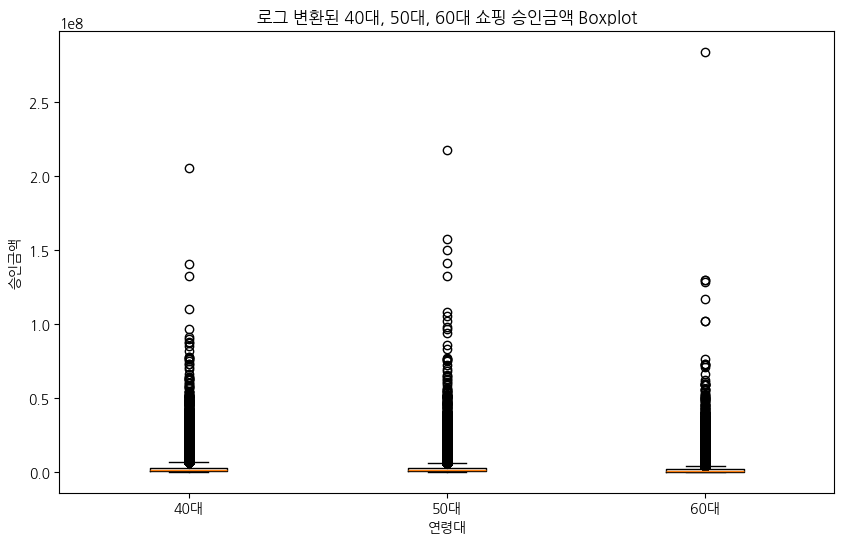

In [38]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_shop = cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액']
cc_22_50_shop = cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액']
cc_22_60_shop = cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액']
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_shop, cc_22_50_shop, cc_22_60_shop]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

## 생활비

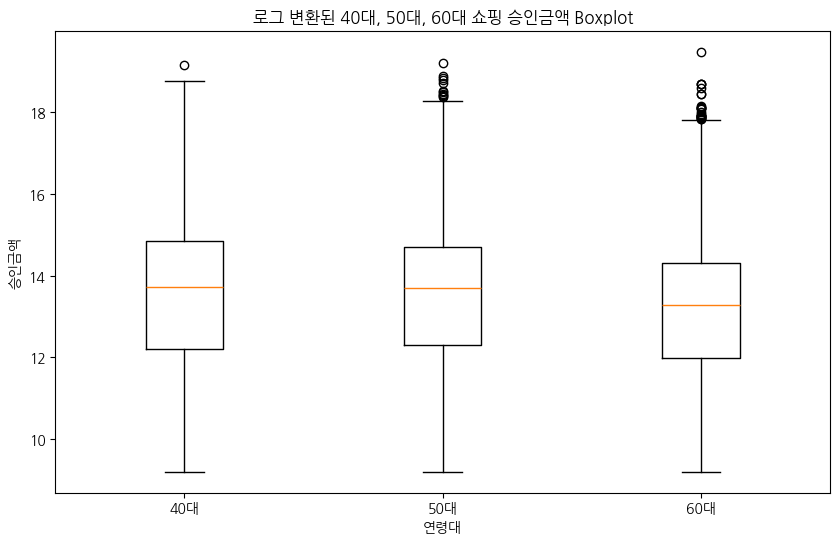

In [31]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_life = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액'])
cc_22_50_life = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액'])
cc_22_60_life = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_life, cc_22_50_life, cc_22_60_life]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

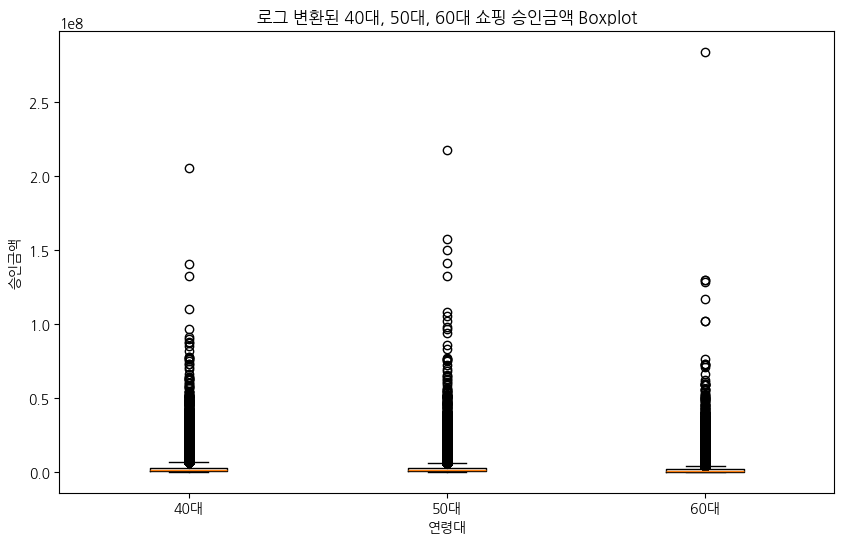

In [37]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_life = cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액']
cc_22_50_life = cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액']
cc_22_60_life = cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액']
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_life, cc_22_50_life, cc_22_60_life]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

## 식음료

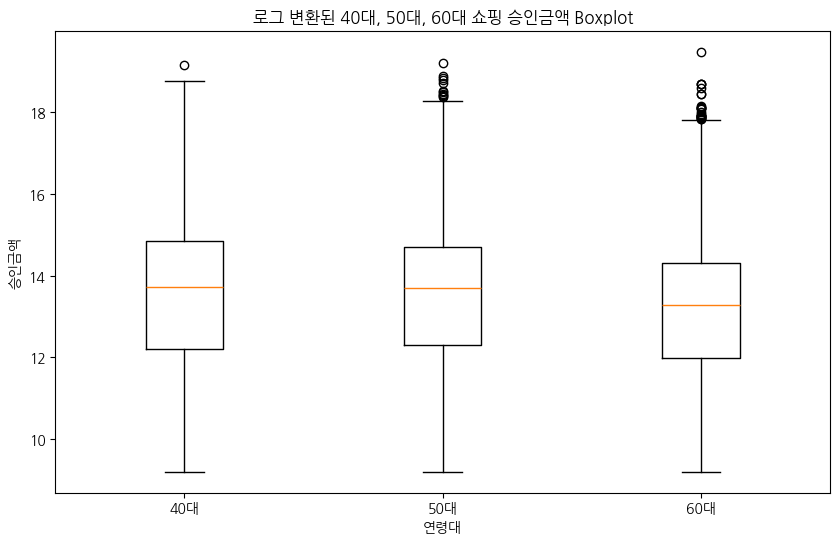

In [32]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_fnb = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액'])
cc_22_50_fnb = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액'])
cc_22_60_fnb = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_fnb, cc_22_50_fnb, cc_22_60_fnb]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

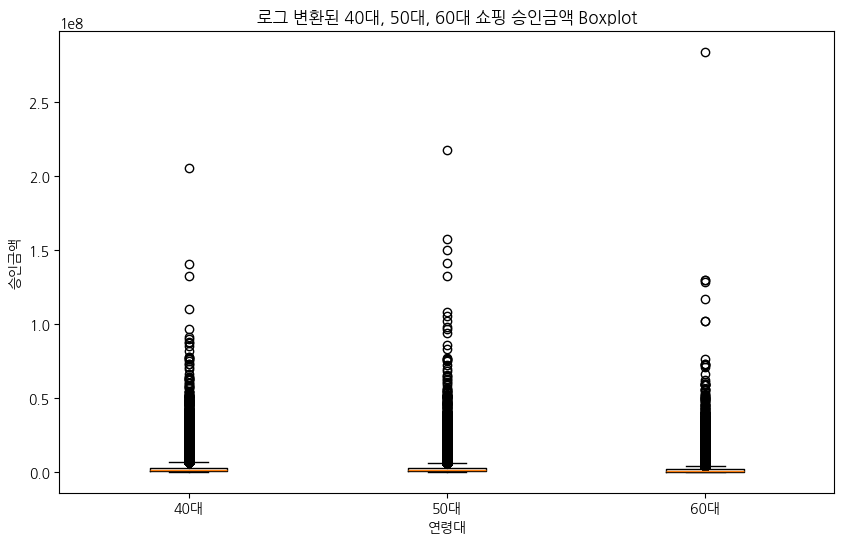

In [36]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_fnb = cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액']
cc_22_50_fnb = cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액']
cc_22_60_fnb = cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액']
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_fnb, cc_22_50_fnb, cc_22_60_fnb]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

## 여가

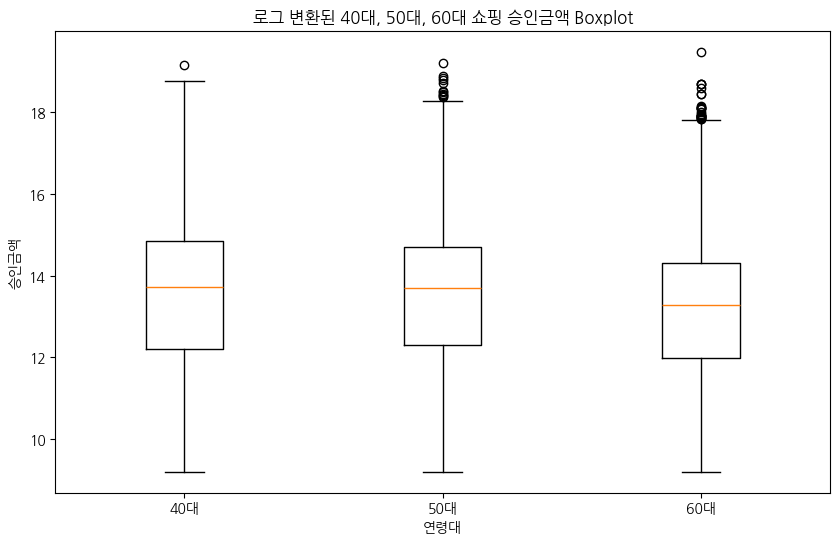

In [33]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_leisure = np.log1p(cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액'])
cc_22_50_leisure = np.log1p(cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액'])
cc_22_60_leisure = np.log1p(cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액'])
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_leisure, cc_22_50_leisure, cc_22_60_leisure]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('로그 변환된 40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

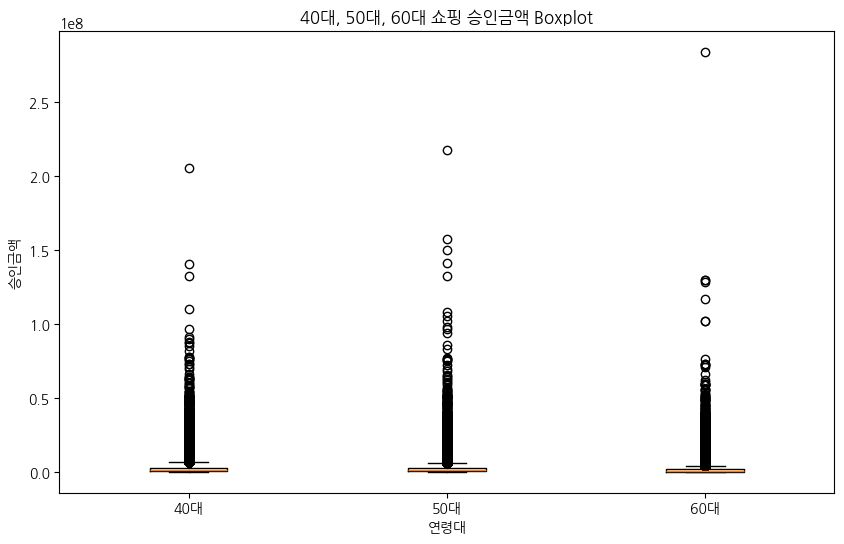

In [35]:
# '분류' 컬럼이 '쇼핑'인 데이터의 '승인금액'만 추출
cc_22_40_leisure = cc_22_40_g[cc_22_40_g['분류'] == '쇼핑']['승인금액']
cc_22_50_leisure = cc_22_50_g[cc_22_50_g['분류'] == '쇼핑']['승인금액']
cc_22_60_leisure = cc_22_60_g[cc_22_60_g['분류'] == '쇼핑']['승인금액']
# boxplot을 그리기 위해 데이터를 리스트로 정리
data = [cc_22_40_leisure, cc_22_50_leisure, cc_22_60_leisure]
# 박스플롯 그리기
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['40대', '50대', '60대'])
plt.title('40대, 50대, 60대 쇼핑 승인금액 Boxplot')
plt.xlabel('연령대')
plt.ylabel('승인금액')
plt.show()

# 22년도 n파일 다시

In [ ]:
cc_22_40 = pd.read_csv(DATA_PATH_3 + 'cc_22_40.csv', encoding="utf-8-sig")
cc_22_50 = pd.read_csv(DATA_PATH_3 + 'cc_22_50.csv', encoding="utf-8-sig")
cc_22_60 = pd.read_csv(DATA_PATH_3 + 'cc_22_60.csv', encoding="utf-8-sig")

In [74]:
def rename_category_store_5(df):
    """
    가맹점 업종명을 미리 정의된 카테고리로 분류하여 새로운 '분류' 컬럼에 추가하는 함수입니다.

    이 함수는 입력된 데이터프레임의 '가맹점업종명' 열의 값들을 사전 정의된 카테고리로 매핑하여,
    각 가맹점이 해당하는 카테고리 정보를 새로운 '분류' 컬럼에 추가합니다. 이를 통해 다양한 업종을
    지정된 범주의 카테고리로 분류하여 분석할 수 있습니다.

    Parameters:
    df (pd.DataFrame): '가맹점업종명' 열을 포함한 데이터프레임.

    Returns:
    pd.DataFrame: '분류' 열이 추가된 데이터프레임.

    Example:
    >>> data = pd.DataFrame({
    ...     '가맹점업종명': ['백화점', '피부미용실', '골프경기장', '주점', '약국'],
    ...     '승인금액': [10000, 20000, 30000, 40000, 50000]
    ... })
    >>> rename_category_store_5(data)
    가맹점업종명 열을 다음과 같은 카테고리로 재분류합니다: ['쇼핑', '기타', '여가', '기타', '식음료']
    
    Categories:
      - 생활비: ['이동통신요금', '의료/보험', '교육/학원', '반려동물', '주유', '미용']
      - 식음료: ['외식', '카페/베이커리', '음식료품']
      - 쇼핑: ['백화점', '홈쇼핑', '온라인쇼핑', '간편결제', '편의점', '대형마트']
      - 여가: ['스포츠/레저', '여행/교통', '문화생활']
      - 기타: ['기타']
    
    """
    
    mapping = {
       '생활비' : ['이동통신요금', '의료/보험' , '교육/학원', '반려동물', '주유', '미용'],
        '식음료' : ['외식', '카페/베이커리', '음식료품'],
        '쇼핑' : ['백화점', '홈쇼핑', '온라인쇼핑', '간편결제', '편의점', '대형마트'],
        '여가' : ['스포츠/레저', '여행/교통', '문화생활'],
        '기타' : ['기타']
    }
 
    df['분류'] = df['가맹점업종명']
    for category, values in mapping.items():
        df.loc[df['가맹점업종명'].isin(values), '분류'] = category

    print(df['분류'].unique())
    return df


In [64]:
cc_22_40.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997364303,202212,이동통신요금,서울특별시,중구,5번이하,70000
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000
2,9997364303,202212,온라인쇼핑,경기도,성남시 분당구,5번이하,80000
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000


In [65]:
cc_22_50.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9998496340,202212,외식,대구광역시,달성군,5번이하,10000
1,9998496340,202212,외식,대구광역시,달서구,5번이하,10000
2,9998496340,202212,외식,대구광역시,달성군,5번이하,10000
3,9998496340,202212,외식,경상북도,경산시,5번이하,40000
4,9998496340,202212,대형마트,대구광역시,중구,5번이하,10000


In [66]:
cc_22_60.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9999998161,202207,여행/교통,대구광역시,수성구,5번초과 10번이하,50000
1,9999998161,202207,여행/교통,대구광역시,수성구,5번이하,20000
2,9999998161,202206,여행/교통,대구광역시,수성구,5번초과 10번이하,50000
3,9999998161,202206,여행/교통,대구광역시,수성구,5번이하,10000
4,9999998161,202205,여행/교통,대구광역시,수성구,10번초과 15번이하,80000


In [75]:
cc_22_50_n = rename_category_store_5(cc_22_50)
cc_22_50_n.head()

['식음료' '쇼핑' '생활비' '여가' '기타']


,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류
0,9998496340,202212,외식,대구광역시,달성군,5번이하,10000,식음료
1,9998496340,202212,외식,대구광역시,달서구,5번이하,10000,식음료
2,9998496340,202212,외식,대구광역시,달성군,5번이하,10000,식음료
3,9998496340,202212,외식,경상북도,경산시,5번이하,40000,식음료
4,9998496340,202212,대형마트,대구광역시,중구,5번이하,10000,쇼핑


In [76]:
#cc_22_50_n.to_csv('cc_22_50_n.csv', index=False, encoding='utf-8-sig')

In [73]:
cc_22_60_n = rename_category_store_5(cc_22_60)
cc_22_60_n.head()

['여가' '쇼핑' '식음료' '기타' '생활비']


,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류
0,9999998161,202207,여행/교통,대구광역시,수성구,5번초과 10번이하,50000,여가
1,9999998161,202207,여행/교통,대구광역시,수성구,5번이하,20000,여가
2,9999998161,202206,여행/교통,대구광역시,수성구,5번초과 10번이하,50000,여가
3,9999998161,202206,여행/교통,대구광역시,수성구,5번이하,10000,여가
4,9999998161,202205,여행/교통,대구광역시,수성구,10번초과 15번이하,80000,여가


In [77]:
#cc_22_60_n.to_csv('cc_22_60_n.csv', index=False, encoding='utf-8-sig')

# 일원 분산분석

## 층화추출

In [78]:
cc_22_40_n = pd.read_csv(DATA_PATH_3 + 'cc_22_40_n.csv', encoding="utf-8-sig")
cc_22_50_n = pd.read_csv(DATA_PATH_3 + 'cc_22_50_n.csv', encoding="utf-8-sig")
cc_22_60_n = pd.read_csv(DATA_PATH_3 + 'cc_22_60_n.csv', encoding="utf-8-sig")

In [79]:
len(cc_22_40_n['고객ID'])

14076734

In [80]:
len(cc_22_50_n['고객ID'])

16283134

In [81]:
len(cc_22_60_n['고객ID'])

12069980

In [60]:
len(cc_23_40_n['고객ID'])

14056764

In [61]:
len(cc_23_50_n['고객ID'])

15218447

In [62]:
len(cc_21_50_n['고객ID'])

15218447

In [63]:
len(cc_21_60_n['고객ID'])

10098075

In [82]:
cc_22_40_n['연령대'] = "40대"
cc_22_40_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류,연령대
0,9997364303,202212,이동통신요금,서울특별시,중구,5번이하,70000,생활비,40대
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000,식음료,40대
2,9997364303,202212,온라인쇼핑,경기도,성남시 분당구,5번이하,80000,쇼핑,40대
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000,생활비,40대
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000,식음료,40대


In [83]:
cc_22_50_n['연령대'] = "50대"
cc_22_50_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류,연령대
0,9998496340,202212,외식,대구광역시,달성군,5번이하,10000,식음료,50대
1,9998496340,202212,외식,대구광역시,달서구,5번이하,10000,식음료,50대
2,9998496340,202212,외식,대구광역시,달성군,5번이하,10000,식음료,50대
3,9998496340,202212,외식,경상북도,경산시,5번이하,40000,식음료,50대
4,9998496340,202212,대형마트,대구광역시,중구,5번이하,10000,쇼핑,50대


In [84]:
cc_22_60_n['연령대'] = "60대이상"
cc_22_60_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류,연령대
0,9999998161,202207,여행/교통,대구광역시,수성구,5번초과 10번이하,50000,여가,60대이상
1,9999998161,202207,여행/교통,대구광역시,수성구,5번이하,20000,여가,60대이상
2,9999998161,202206,여행/교통,대구광역시,수성구,5번초과 10번이하,50000,여가,60대이상
3,9999998161,202206,여행/교통,대구광역시,수성구,5번이하,10000,여가,60대이상
4,9999998161,202205,여행/교통,대구광역시,수성구,10번초과 15번이하,80000,여가,60대이상


In [90]:
cc_22_40_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14076734 entries, 0 to 14076733
Data columns (total 9 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   고객ID      int64 
 1   거래년월      int64 
 2   가맹점업종명    object
 3   가맹점_광역시도  object
 4   가맹점_시군구   object
 5   승인건수      object
 6   승인금액      int64 
 7   분류        object
 8   연령대       object
dtypes: int64(3), object(6)
memory usage: 966.6+ MB


In [87]:
cc_22_n = pd.concat([cc_22_40_n, cc_22_50_n, cc_22_60_n], axis=0).reset_index(drop=True)
cc_22_n.head()

MemoryError: Unable to allocate 324. MiB for an array with shape (42429848,) and data type int64

In [ ]:
cc_22_n.to_csv()

In [ ]:
column 삭제
df_40 = cc_21_40_n.drop(columns=['거래년월', '가맹점_광역시도', '가맹점_시군구', '승인건수', '가맹점업종명', '고객ID'])
층화추출
# '분류' 항목별 데이터 개수 확인
counts = df_40['분류'].value_counts()
total_count = len(df_40)
# 각 분류별 비율 계산
sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
# '분류'별로 비율대로 표본 추출
sample_df_40 = df_40.groupby('분류', group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
)
print("40대 분류별 비율에 따른 층화 추출 결과:")
sample_df_40
분류 갯수 확인
sample_df_40['분류'].value_counts()


# 고객 ID와 분류로 그룹화하여 승인금액 합산
df_40 = cc_21_40_n.groupby(['고객ID', '분류'])['승인금액'].sum().reset_index()
# 결과 출력 (합산된 데이터프레임의 첫 몇 줄을 확인)
print(df_40)
column 삭제
df_40 = df_40.drop(columns=['고객ID'])
층화추출 후 분류별 연간 승인금액 평균
# '분류' 항목별 데이터 개수 확인
counts = df_40['분류'].value_counts()
total_count = len(df_40)
# 각 분류별 비율 계산
sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
# '분류'별로 비율대로 표본 추출
sample_df_40 = df_40.groupby('분류', group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
)
# 샘플 데이터 보고 싶으면
# print("40대 분류별 비율에 따른 층화 추출 결과:")
# sample_df_40
# 분류별 승인금액 평균 계산
aver_sample_40 = sample_df_40.groupby('분류')['승인금액'].mean()
pd.options.display.float_format = '{:,.0f}'.format
print("분류별 연간 승인금액 평균:")
aver_sample_40


층화추출 할 때 

In [39]:
def strat(df, feature1, feature2, target):
    df_groupby = df.groupby([feature1, feature2])[target].sum().reset_index()
    df_drop = df_groupby.drop(columns=[feature1])
    counts = df_drop[feature2].value_counts()
    total_count = len(df_drop)
    sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
    sample_df = df.groupby(feature2, group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
    )
    aver_sample = sample_df.groupby(feature2)[target].mean()
    pd.options.display.float_format = '{:,.0f}'.format
    print(f"{feature2}별 연간 {target} 평균:")
    return aver_sample  # 반환값 추가

In [45]:
cc_22_n.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,분류,연령대
0,9997364303,202212,이동통신요금,서울특별시,중구,5번이하,70000,생활비,40대
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000,식음료,40대
2,9997364303,202212,온라인쇼핑,경기도,성남시 분당구,5번이하,80000,쇼핑,40대
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000,생활비,40대
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000,식음료,40대


In [46]:
def strat(df, feature1, feature2, target):
    """
    주어진 데이터프레임에서 지정된 기준으로 그룹화하고, 각 그룹에서 표본을 추출하여
    target 변수의 평균을 계산하는 함수입니다.

    매개변수:
    df (pd.DataFrame): 분석에 사용할 데이터프레임입니다.
    feature1 (str): 그룹화에 사용할 첫 번째 기준 컬럼입니다.
    feature2 (str): 그룹화에 사용할 두 번째 기준 컬럼입니다.
    target (str): 평균을 계산할 대상 컬럼입니다.

    반환값:
    pd.Series: feature2별로 계산된 target의 연간 평균을 반환합니다.

    예제:
    aver_sample = strat(df, '고객ID', '분류', '승인금액')

    설명:
    이 함수는 feature1과 feature2로 그룹화하여 target의 총합을 계산한 후, 
    feature2의 각 그룹에서 임의로 표본을 추출하여 target의 평균을 계산합니다.
    표본 크기는 각 그룹의 데이터 수에 따라 비율로 설정되며, 
    총 표본 수는 10,000개로 기본 설정되어 있습니다.
    최종적으로 feature2별 target의 연간 평균을 출력하고 반환합니다.
    """
    df_groupby = df.groupby([feature1, feature2])[target].sum().reset_index()
    df_drop = df_groupby.drop(columns=[feature1])
    counts = df_drop[feature2].value_counts()
    total_count = len(df_drop)
    sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
    sample_df = df.groupby(feature2, group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
    )
    aver_sample = sample_df.groupby(feature2)[target].mean()
    pd.options.display.float_format = '{:,.0f}'.format
    print(f"{feature2}별 연간 {target} 평균:")
    return aver_sample  # 반환값 추가

In [47]:
def strat_new(df, feature1, feature2, target):
    """
    주어진 데이터프레임에서 지정된 기준으로 그룹화하고, 각 그룹에서 표본을 추출하여
    target 변수의 평균을 계산하는 함수입니다.

    매개변수:
    df (pd.DataFrame): 분석에 사용할 데이터프레임입니다.
    feature1 (str): 그룹화에 사용할 첫 번째 기준 컬럼입니다.
    feature2 (str): 그룹화에 사용할 두 번째 기준 컬럼입니다.
    target (str): 평균을 계산할 대상 컬럼입니다.

    반환값:
    pd.Series: feature2별로 계산된 target의 연간 평균을 반환합니다.

    예제:
    aver_sample = strat(df, '고객ID', '분류', '승인금액')

    설명:
    이 함수는 feature1과 feature2로 그룹화하여 target의 총합을 계산한 후, 
    feature2의 각 그룹에서 임의로 표본을 추출하여 target의 평균을 계산합니다.
    표본 크기는 각 그룹의 데이터 수에 따라 비율로 설정되며, 
    총 표본 수는 10,000개로 기본 설정되어 있습니다.
    최종적으로 feature2별 target의 연간 평균을 출력하고 반환합니다.
    """
    df_groupby = df.groupby([feature1, feature2])[target].sum().reset_index()
    df_drop = df_groupby.drop(columns=[feature1])
    counts = df_drop[feature2].value_counts()
    total_count = len(df_drop)
    sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
    sample_df = df.groupby(feature2, group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
    )
    aver_sample = sample_df.groupby(feature2)[target].mean()
    pd.options.display.float_format = '{:,.0f}'.format
    print(f"{feature2}별 연간 {target} 평균:")
    return aver_sample  # 반환값 추가

In [48]:
strat_new(cc_22_n, "분류", "연령대", "승인금액")

연령대별 연간 승인금액 평균:


연령대
40대     56,937
50대     59,205
60대이상   58,185
Name: 승인금액, dtype: float64

In [51]:
cc_22_n_test = cc_22_n.groupby(["분류", "연령대"])["승인금액"].sum().reset_index()
cc_22_n_test

,분류,연령대,승인금액
0,기타,40대,97489680000
1,기타,50대,97489680000
2,기타,60대이상,97489680000
3,생활비,40대,172447150000
4,생활비,50대,172447150000
5,생활비,60대이상,172447150000
6,쇼핑,40대,324120990000
7,쇼핑,50대,324120990000
8,쇼핑,60대이상,324120990000
9,식음료,40대,167029660000


In [58]:
cc_counts = cc_22_n["연령대"].value_counts()
cc_counts

연령대
40대      14076734
50대      14076734
60대이상    14076734
Name: count, dtype: int64

In [54]:
def strat_new_new(df, feature1, feature2, target):
    """
    주어진 데이터프레임에서 지정된 기준으로 그룹화하고, 각 그룹에서 표본을 추출하여
    target 변수의 평균을 계산하는 함수입니다.

    매개변수:
    df (pd.DataFrame): 분석에 사용할 데이터프레임입니다.
    feature1 (str): 그룹화에 사용할 첫 번째 기준 컬럼입니다.
    feature2 (str): 그룹화에 사용할 두 번째 기준 컬럼입니다.
    target (str): 평균을 계산할 대상 컬럼입니다.

    반환값:
    pd.Series: feature2별로 계산된 target의 연간 평균을 반환합니다.

    예제:
    aver_sample = strat(df, '고객ID', '분류', '승인금액')

    설명:
    이 함수는 feature1과 feature2로 그룹화하여 target의 총합을 계산한 후, 
    feature2의 각 그룹에서 임의로 표본을 추출하여 target의 평균을 계산합니다.
    표본 크기는 각 그룹의 데이터 수에 따라 비율로 설정되며, 
    총 표본 수는 10,000개로 기본 설정되어 있습니다.
    최종적으로 feature2별 target의 연간 평균을 출력하고 반환합니다.
    """
    df_groupby = df.groupby([feature1, feature2])[target].sum().reset_index()
    counts = df_groupby[feature2].value_counts()
    total_count = len(df_groupby)
    sample_sizes = (counts / total_count * 10000).astype(int)  # 예시로 10000개 추출 기준 설정 (원하는 표본 크기 조정 가능)
    sample_df = df.groupby(feature2, group_keys=False).apply(
    lambda x: x.sample(n=sample_sizes[x.name])
    )
    aver_sample = sample_df.groupby(feature2)[target].mean()
    pd.options.display.float_format = '{:,.0f}'.format
    print(f"{feature2}별 연간 {target} 평균:")
    return aver_sample  # 반환값 추가

In [55]:
strat_new_new(cc_22_n, "분류", "연령대", "승인금액")

연령대별 연간 승인금액 평균:


연령대
40대     55,437
50대     55,626
60대이상   61,893
Name: 승인금액, dtype: float64